<h2 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);"> 0.Modules

In [1]:
import urllib.request
import os
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

Using TensorFlow backend.


<h2 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);"> 1.Download file and read excel data

In [2]:
url= 'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls'
filepath = './titanic3.xls'
if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url, filepath)
    print('downloading:', result)
    all_df = pd.read_excel(filepath)
    print('data loaded.')
else:
    print('downloaded already')
    all_df = pd.read_excel(filepath)
    print('data loaded.')

downloaded already
data loaded.


<h2 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);"> 2.Split data into Train and Test

In [3]:
msk=np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [4]:
print('Total:', len(all_df),
      'Train:', len(train_df),
      'Test:', len(test_df))

Total: 1309 Train: 1051 Test: 258


<h2 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);"> 3.Preproccessing Fuction

In [5]:
# Titanic data preprocessing function
def preprocessTitanicData(raw_df):
    df = raw_df[['survived', 'pclass', 'sibsp', 'parch', 'age', 'sex', 'fare', 'embarked']]
    df['age'] = df['age'].fillna(df['age'].mean())
    df['fare'] = df['fare'].fillna(df['fare'].mean())
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    x_onehot_df = pd.get_dummies(data=df, columns= ['embarked'])
    ndarray = x_onehot_df.values
    feature = ndarray[:,1:]
    label = ndarray[:, 0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures = minmax_scale.fit_transform(feature)
    
    return scaledFeatures, label

In [6]:
# Show training history
def show_train_history(train_histroy, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [7]:
x_train, y_train = preprocessTitanicData(train_df)
x_test, y_test = preprocessTitanicData(test_df)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<h2 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);"> 4.Constructing model

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=40, 
                input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=30, 
                kernel_initializer='uniform',
                activation='relu'))

In [12]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

<h2 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);"> 5.Training model

In [13]:
# Use compile method to set model details.
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [14]:
train_history = model.fit(x=x_train, 
                          y=y_train,
                          validation_split=0.1,
                          epochs=30, 
                          batch_size=30,
                          verbose=1)

Train on 945 samples, validate on 106 samples
Epoch 1/30
945/945 [==============================] - 0s - loss: 0.6879 - acc: 0.6085 - val_loss: 0.6636 - val_acc: 0.7736
Epoch 2/30
945/945 [==============================] - 0s - loss: 0.6565 - acc: 0.6138 - val_loss: 0.5684 - val_acc: 0.7736
Epoch 3/30
945/945 [==============================] - 0s - loss: 0.5936 - acc: 0.6963 - val_loss: 0.4780 - val_acc: 0.8019
Epoch 4/30
945/945 [==============================] - 0s - loss: 0.5374 - acc: 0.7556 - val_loss: 0.4450 - val_acc: 0.8019
Epoch 5/30
945/945 [==============================] - 0s - loss: 0.5062 - acc: 0.7693 - val_loss: 0.4420 - val_acc: 0.8208
Epoch 6/30
945/945 [==============================] - 0s - loss: 0.4961 - acc: 0.7524 - val_loss: 0.4285 - val_acc: 0.8208
Epoch 7/30
945/945 [==============================] - 0s - loss: 0.4877 - acc: 0.7672 - val_loss: 0.4265 - val_acc: 0.8208
Epoch 8/30
945/945 [==============================] - 0s - loss: 0.4859 - acc: 0.7598 - val_l

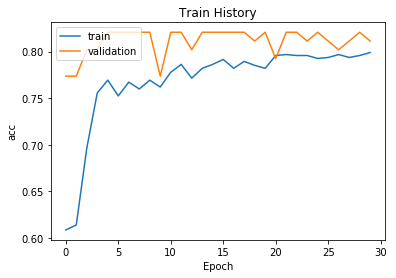

In [15]:
show_train_history(train_history, 'acc', 'val_acc')

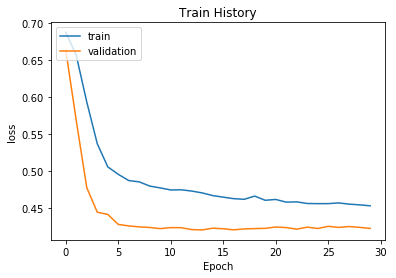

In [16]:
show_train_history(train_history, 'loss', 'val_loss')

<h2 style="background-image: linear-gradient( 135deg, #FFF6B7 10%, #F6416C 100%);"> Check model prediction

In [17]:
scores = model.evaluate(x_test, y_test)
print()
print('accuracy=', scores[1])

 32/258 [==>...........................] - ETA: 0s
accuracy= 0.825581395349


<h2 style="background-image: linear-gradient( 135deg, #FFF6B7 10%, #F6416C 100%);"> Compare prediction with actual data.

In [18]:
all_x, all_y = preprocessTitanicData(all_df)
all_probability=model.predict(all_x)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
all_df['predict_p'] = all_probability

<h2 style="background-image: linear-gradient( 135deg, #81FBB8 10%, #28C76F 100%);"> Saying something?

In [20]:
# Check some 
all_df[(all_df['predict_p']>0.9)&(all_df['survived'] == 0)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,predict_p
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.972782
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.968761
105,1,0,"Evans, Miss. Edith Corse",female,36.0,0,0,PC 17531,31.6792,A29,C,NaN,NaN,"New York, NY",0.977238
169,1,0,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,NaN,NaN,"Paris, France New York, NY",0.973683
286,1,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S,NaN,NaN,"New York, NY",0.941418


- Allison一家人的故事
- Ann Elizabeth的愛狗故事
- Straus, Mrs. Isidor與老公的愛情故事

In [21]:
# Check some 
all_df[(all_df['predict_p']<0.1)&(all_df['survived'] == 1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,predict_p
1003,3,1,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.25,NaN,Q,16,NaN,NaN,0.099093


- Niskanen, Mr. Juha的故事 https://www.encyclopedia-titanica.org/titanic-survivor/juha-niskanen.html